# Notebook used for the Kaggle Competition [Titanic -Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview)

## Importing Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



## Importing Data

Data can be downloaded at [data](https://www.kaggle.com/competitions/titanic/data)

In [55]:
test_data = pd.read_csv('D:\\Kaggle\\Competitions\\Titanic - Machine Learning from Disaster\\test.csv')
train_data = pd.read_csv('D:\\Kaggle\\Competitions\\Titanic - Machine Learning from Disaster\\train.csv')

In [5]:
## Looking at train data, used for building the model
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### In this dataset, we have 10 variables to assess the model, 1 Target, and 1 ID; the latter will be used to compile the results.


## Pre-process and Data visualization

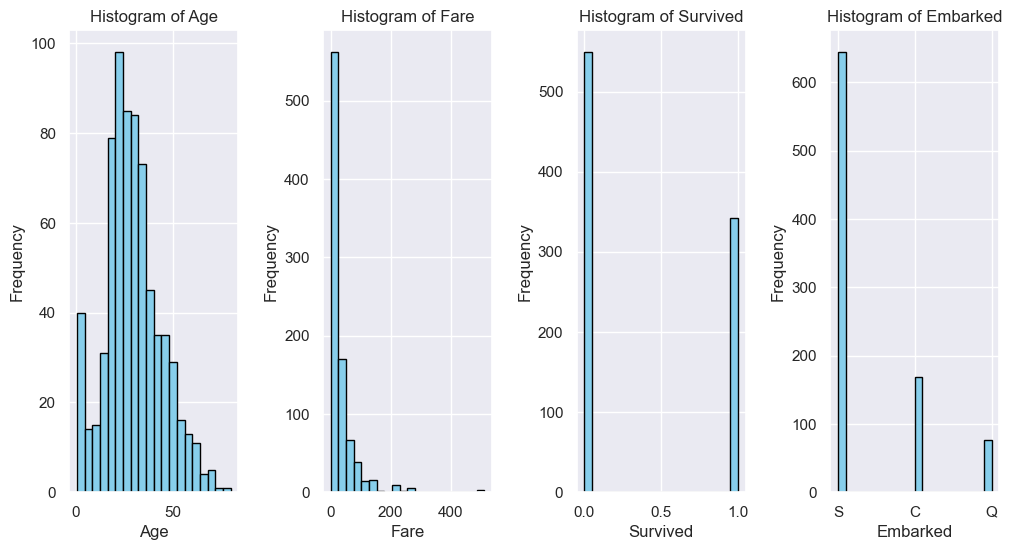

In [21]:
## Histogram of Age, Fare and Survived
variaveis_numericas = ['Age', 'Fare','Survived', 'Embarked']

plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, variavel in enumerate(variaveis_numericas, 1):
    plt.subplot(1, len(variaveis_numericas), i)
    plt.hist(train_data[variavel].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {variavel}')
    plt.xlabel(variavel)
    plt.ylabel('Frequency')
    
plt.show()

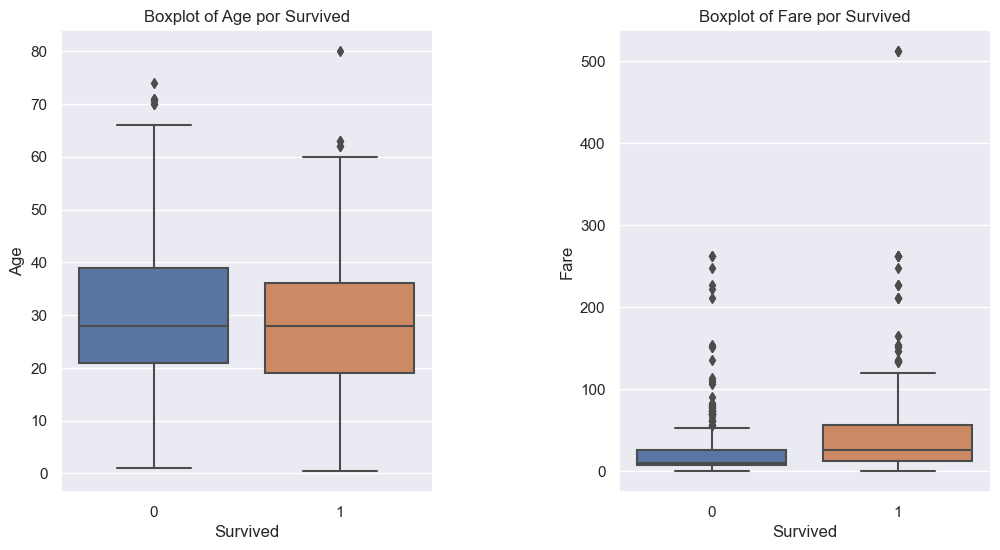

In [13]:

# Lista de variáveis numéricas para criar boxplots
variaveis_numericas = ['Age', 'Fare']

# Configurações do layout do gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, variavel in enumerate(variaveis_numericas, 1):
    plt.subplot(1, len(variaveis_numericas), i)
    sns.boxplot(x='Survived', y=variavel, data=train_data)
    plt.title(f'Boxplot of {variavel} por Survived')

# Exiba os boxplots
plt.show()

In [83]:
## Analysing the Survival rate at children (Age under 18)
train_data['Child'] = 0
train_data.loc[(train_data['Age']<18),['Child']] = 1

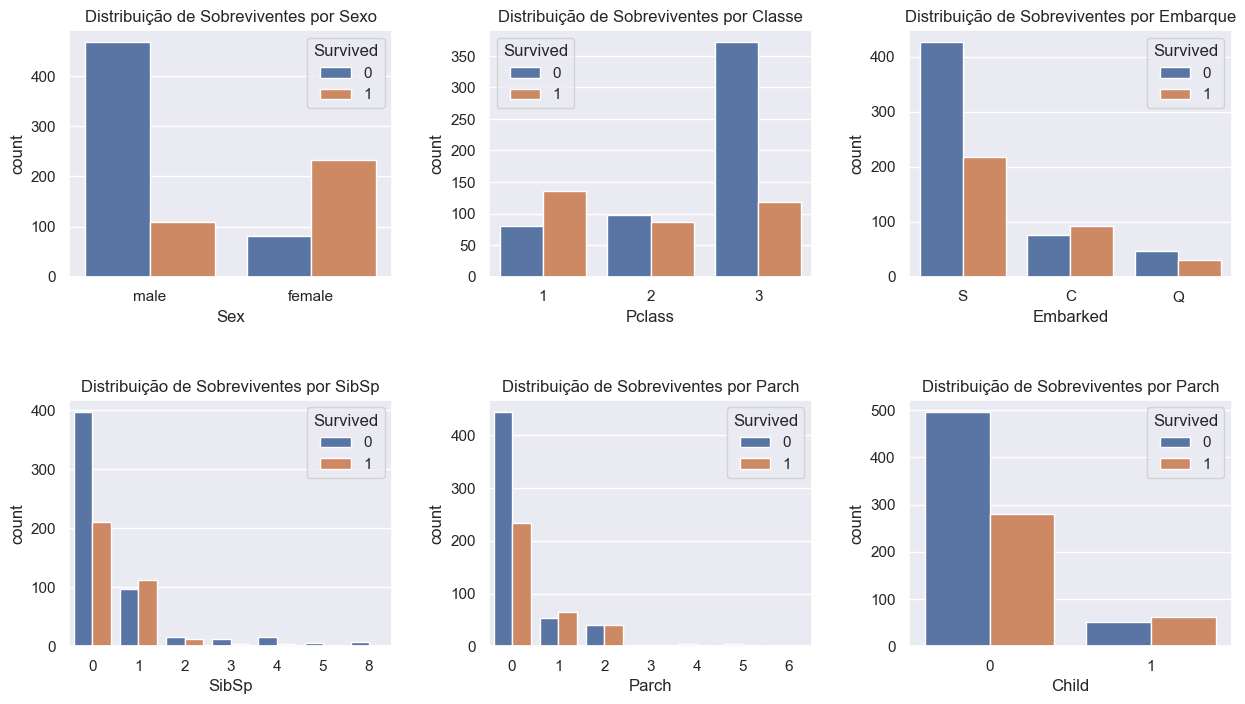

In [108]:
# Configurações do layout do gráfico
plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Gráfico de barras para 'Sex' em relação a 'Survived'
plt.subplot(2, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes por Sexo')

# Gráfico de barras para 'Pclass' em relação a 'Survived'
plt.subplot(2, 3, 2)
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes por Classe')

# Gráfico de barras para 'Embarked' em relação a 'Survived'
plt.subplot(2, 3, 3)
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes por Embarque')

# Gráfico de barras para 'SibSp' em relação a 'Survived'
plt.subplot(2, 3, 4)
sns.countplot(x='SibSp', hue='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes por SibSp')

# Gráfico de barras para 'Parch' em relação a 'Survived'
plt.subplot(2, 3, 5)
sns.countplot(x='Parch', hue='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes por Parch')

# Gráfico de barras para 'Parch' em relação a 'Survived'
plt.subplot(2, 3, 6)
sns.countplot(x='Child', hue='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes por Parch')
# Exiba os gráficos de barras

plt.show()

Text(0.5, 1.0, 'Distribuição de Sobreviventes por Classe')

<Figure size 800x500 with 0 Axes>

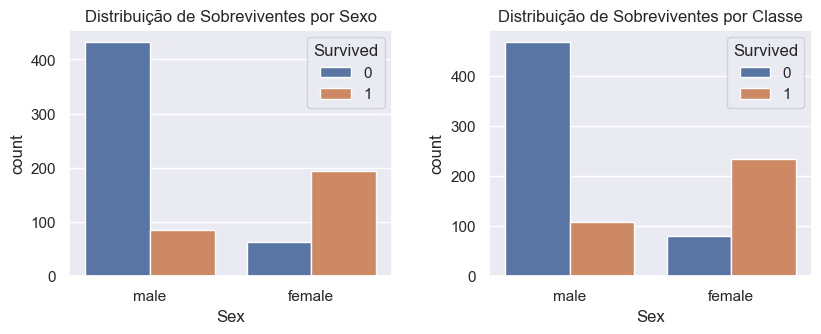

In [174]:
# Configurações do layout do gráfico
plt.figure(figsize=(8, 5))
df = train_data.loc[(train_data['Child']==0)]

# Configurações do layout do gráfico
plt.figure(figsize=(15, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.3)


# Gráfico de barras para 'Sex' em relação a 'Survived'
plt.subplot(2, 3, 1)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Distribuição de Sobreviventes por Sexo')

# Gráfico de barras para 'Pclass' em relação a 'Survived'
plt.subplot(2, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Distribuição de Sobreviventes por Classe')



In [70]:
## Searching for missing data, and categorical uniques
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.156004
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.363063
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,0.000000


### Some take aways: 
- #### Females have a way bigger chance to survive
- #### An Adult have a higher chance do decease compared to children
- #### 3rd class tickest means a bigger chance to decease in the disaster
- #### Not embarking at Southampton, give the person a higher to survive, Most of people embarked in Southampton, including the crew.
- #### By visualizating the Data the most impactful features was: 'Sex', 'Pclass', 'Child', 'Parch', 'SibSp' and 'Embarked'
#### PassengerId and Name don't have correlation with the target. Cabin have too many missing values. Tickets have too many unique values. We will take out all of those to create a model

In [199]:
## Creating Dummies for Embarked and Sex
train_dummy = train_data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [200]:
## Removing missing data
train_dummy = train_dummy.dropna(axis=0)

In [201]:
## Creating dummies to 'Sex'
train_dummy.loc[(train_dummy['Sex']=='male'),['Sex']] = 0
train_dummy.loc[(train_dummy['Sex']=='female'),['Sex']] = 1

In [202]:
## Creating dummies to 'Embarke'
train_dummy.loc[(train_dummy['Embarked']=='S'),['Embarked']] = 0
train_dummy.loc[(train_dummy['Embarked']=='C'),['Embarked']] = 1
train_dummy.loc[(train_dummy['Embarked']=='Q'),['Embarked']] = 2

In [203]:
train_dummy.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child
count,712.000000,712.000000,712.0,712.000000,712.000000,712.000000,712.000000,712.0,712.000000
unique,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN
top,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
freq,NaN,NaN,453.0,NaN,NaN,NaN,NaN,554.0,NaN
mean,0.404494,2.240169,NaN,29.642093,0.514045,0.432584,34.567251,NaN,0.158708
std,0.491139,0.836854,NaN,14.492933,0.930692,0.854181,52.938648,NaN,0.365660
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,0.000000
25%,0.000000,1.000000,NaN,20.000000,0.000000,0.000000,8.050000,NaN,0.000000
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.645850,NaN,0.000000
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.000000,NaN,0.000000


In [210]:
train_dummy['Embarked'] = train_dummy['Embarked'].astype(int)
train_dummy['Sex'] = train_dummy['Sex'].astype(int)

## Logistic Model

Using the selected features above. We are replacing 'Age' for 'Child', labeling this way have a higher impact to the Age predicting as we could see.


In [211]:
# Creating a list with the selected features.
selected_features = ['Sex', 'Pclass', 'Child', 'Parch' , 'SibSp','Embarked']


In [212]:
train_dummy[selected_features].describe()

,Sex,Pclass,Child,Parch,SibSp,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.363764,2.240169,0.158708,0.432584,0.514045,0.261236
std,0.481420,0.836854,0.365660,0.854181,0.930692,0.521561
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,3.000000,1.000000,6.000000,5.000000,2.000000


In [256]:
x1 = train_dummy[selected_features]
y = train_dummy['Survived']

In [257]:
## Add a constant to the model, and fitting it with the data
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.450782
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Dec 2023   Pseudo R-squ.:                  0.3320
Time:                        15:29:23   Log-Likelihood:                -320.96
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 6.953e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9866      0.285      3.466      0.001       0.429       1.545
Sex            2.6868      0.222     12.118      0.000       2.252       3.121
Pclass        -1.1168      0.127     -8.773      0.000      -1.366      -0.867
Child          1.5778      0.317      4.983      0.000       0.957       2.198
Parch         -0.1068      0.119     -0.901      0.368      -0.339       0.126
SibSp         -0.4109      0.129     -3.187      0.001      -0.664      -0.158
Embarked       0.0822      0.193      0.426      0.670      -0.296       0.460
==============================================================================
"""

In [288]:
## Confusiong Matrix
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual,380.0,44.0
Actual 1,94.0,194.0


In [289]:
## Accuracy of the model
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.8061797752808989

In [226]:
## Droppin Parch and Embarked, for high p-value.
x1 = train_dummy[selected_features].drop(['Parch'], axis=1)

In [227]:
## Add a constant to the model, and fitting it with the data
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.451361
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Thu, 28 Dec 2023   Pseudo R-squ.:                  0.3311
Time:                        15:17:09   Log-Likelihood:                -321.37
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.242e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9730      0.284      3.424      0.001       0.416       1.530
Sex            2.6418      0.215     12.288      0.000       2.220       3.063
Pclass        -1.1169      0.127     -8.770      0.000      -1.367      -0.867
Child          1.5360      0.313      4.907      0.000       0.922       2.150
SibSp         -0.4382      0.126     -3.484      0.000      -0.685      -0.192
Embarked       0.0821      0.193      0.426      0.670      -0.295       0.460
==============================================================================
"""

In [228]:
## Confusion Matrix
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual,377.0,47.0
Actual 1,94.0,194.0


###  Even dropping the lowe p-values, we ended with a worst model than Before. We will keep the first selected features

selected_features = ['Sex', 'Pclass', 'Child', 'Parch' , 'SibSp','Embarked']

## Pre-Proceesing the Test Data

In [247]:
test_model = test_data.copy()
test_model.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [248]:
## Using mean for Age and dropping Fare, as its not part of or selected features
test_model.loc[(test_model['Age'].isna()),['Age']] = test_model['Age'].mean()
test_model = test_model.drop('Fare', axis=1)

In [249]:
## Creating the Child Column
test_model['Child'] = 0
test_model.loc[(test_model['Age']<18),['Child']] = 1

In [250]:
test_model.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Child
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,91,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,76,3,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,B57 B59 B63 B66,S,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,3,270,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,NaN,NaN,0.098086
std,120.810458,0.841838,NaN,NaN,12.634534,0.896760,0.981429,NaN,NaN,NaN,0.297787
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,30.272590,0.000000,0.000000,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,NaN,NaN,0.000000


In [251]:
## Creating dummies to 'Sex'
test_model.loc[(test_model['Sex']=='male'),['Sex']] = 0
test_model.loc[(test_model['Sex']=='female'),['Sex']] = 1

## Creating dummies to 'Embarke'
test_model.loc[(test_model['Embarked']=='S'),['Embarked']] = 0
test_model.loc[(test_model['Embarked']=='C'),['Embarked']] = 1
test_model.loc[(test_model['Embarked']=='Q'),['Embarked']] = 2

## type int to force numerical data
test_model['Embarked'] = test_model['Embarked'].astype(int)
test_model['Sex'] = test_model['Sex'].astype(int)

In [254]:
test_model.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Child
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.363636,30.272590,0.447368,0.392344,0.464115,0.098086
std,120.810458,0.841838,0.481622,12.634534,0.896760,0.981429,0.685516,0.297787
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,30.272590,0.000000,0.000000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,35.750000,1.000000,0.000000,1.000000,0.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,2.000000,1.000000


### Using Test data to predict the results

In [258]:
x1 = test_model[selected_features]
x = sm.add_constant(x1)
test_model['Survived'] = results_log.predict(x)

In [259]:
test_model.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Child,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,NaN,2,0,0.099800
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,NaN,0,0,0.478046
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,NaN,2,0,0.253006
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,NaN,0,0,0.085977
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,NaN,0,0,0.451478
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,NaN,0,1,0.313027
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,NaN,2,0,0.619485
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,NaN,0,0,0.146202
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,NaN,1,0,0.599936
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,NaN,0,0,0.039712


#### Now we will create the two results for submission. Why?
#### Well, our model have a bias to make a more wrong predctions when predcting survivals than when predcting deaths. As a learning process, and olny that, we find a threshold where this bias is balanced for both predictions

We are doing this only to chek the overall accuracy VS individual error%, and learn from it. In case we have a bias test_sample, it could affect the final results score, as we have acess our score in the competition, let's use it as a learning tool.

In [294]:
## threshold = 0.5 (survived if predict more than 0.5) ~10% error on predictin decease, and ~32% error predicting survivors
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual,380.0,44.0
Actual 1,94.0,194.0


In [295]:
## Accuracy of the model
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.8061797752808989

In [317]:
## threshold = 0.45 (survived if predict more than 0.45)~22% error on predictin decease, and ~21% error predicting survivors
cm_df = pd.DataFrame(results_log.pred_table(threshold=0.45))
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual,328.0,96.0
Actual 1,61.0,227.0


In [318]:
## Accuracy of the model
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.7794943820224719

#### The accuracy of the model decreased, but remember we are doing this just for learning

In [303]:
## Creating the two dfs
test_result05 = test_model.copy()
test_result045 = test_model.copy()

In [304]:
test_result05.loc[(test_result05['Survived']<=0.5),['Survived']] = 0
test_result05.loc[(test_result05['Survived']>0.5),['Survived']] = 1
test_result05.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Child,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,NaN,2,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,NaN,0,0,0.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,NaN,2,0,0.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,NaN,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,NaN,0,0,0.0


In [305]:
test_result045.loc[(test_result045['Survived']<=0.45),['Survived']] = 0
test_result045.loc[(test_result045['Survived']>0.45),['Survived']] = 1
test_result045.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Child,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,NaN,2,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,NaN,0,0,1.0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,NaN,2,0,0.0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,NaN,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,NaN,0,0,1.0


In [308]:
## Creating the Result Subset as the competition demands
result05 = test_result05[['PassengerId', 'Survived']]
result045 = test_result045[['PassengerId', 'Survived']]

In [309]:
result05['Survived'] = result05['Survived'].astype(int)
result045['Survived'] = result045['Survived'].astype(int)

C:\Users\Rofel\AppData\Local\Temp\ipykernel_16280\1162399563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result05['Survived'] = result05['Survived'].astype(int)
C:\Users\Rofel\AppData\Local\Temp\ipykernel_16280\1162399563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result045['Survived'] = result045['Survived'].astype(int)


## Creating csv Output

In [310]:
from pathlib import Path

In [311]:
filepath05 = Path('D:/Kaggle/Competitions/Titanic - Machine Learning from Disaster/titanic_predict_05.csv')  
filepath045= Path('D:/Kaggle/Competitions/Titanic - Machine Learning from Disaster/titanic_predict_045.csv')  

In [314]:
result05.to_csv(filepath05,index=False)
result045.to_csv(filepath045,index=False)


# RESULTS

##### With the model with 0.5 of threshold we have a score of: 0.7727 - Getting 77.27% of the results right 
##### With the model with 0.45 of threshold we have a score of: 0.7368 - Getting 73.68% of the results right 

From this we can learn that the total accuracy of the model is more relevant for predicting, and we should treat bias test samples in another way. Treating the threshold change as a specific case, when we have more information about the problem/business and have more assurance that it's needed.